# The Variably Intense Vocalizations of Affect and Emotion Corpus (VIVAE) 

In this notebook, I will be performing the exploratory data analysis (EDA) of the VIVAE dataset. The dataset as decribed on it's official website includes  the full set, comprising of 1085 audio files, features eleven speakers expressing three positive (achievement/ triumph, and surprise) and three negative (anger, fear, physical pain) affective states, each parametrically varied from low to peak emotion intensity.


In [43]:
#Importing required libraries
from matplotlib import ticker, cm
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import specgram
import seaborn as sns 
import os
from scipy.io import wavfile
import statistics
from plotly.subplots import make_subplots 
#unzipping the data folder
from zipfile import ZipFile


#library for working with audio files
import librosa
import librosa.display
import IPython.display as idisp
from IPython.display import Audio

%matplotlib inline

In [2]:
def plot_wave_spec(audio_file,title):
  display(idisp.Audio(audio_file, autoplay=True))

  # plotting the waveplot
  data, sampling_rate = librosa.load(audio_file)
  plt.figure(figsize=(15, 5))
  plt.title('Waveplot - ' + title)
  wave = librosa.display.waveshow(data, sr=sampling_rate)
  plt.show()

  # creating the log spectrum 
  spectogram = librosa.feature.melspectrogram(y = data, sr = sampling_rate, n_mels=128,fmax=8000)
  spectogram = librosa.power_to_db(spectogram)
  plt.figure(figsize=(15, 5))

  spec = librosa.display.specshow(spectogram, y_axis = 'mel', fmax=8000, x_axis = 'time')
  plt.title('Mel Spectogram')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

## Printing the different levels of audio wavelength and spectograms of an emotion 
I'll start the analysis by firstly plotting the audio, it's respective wavelength and MEL spectogram.

In the **spectogram**, the y axis displays the frequency in Hertz, the x axis represents time, and amplitude is represented by brightness. 

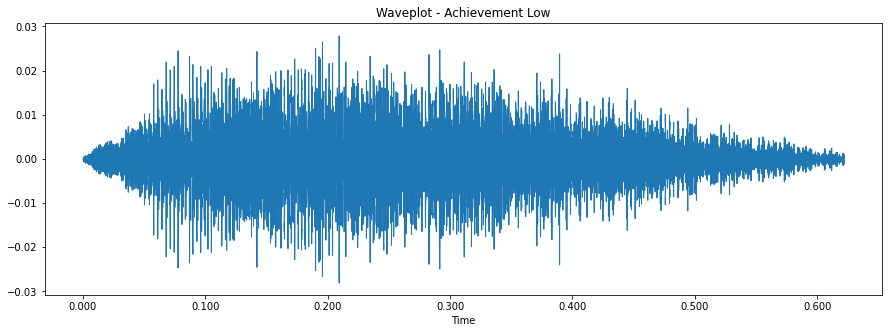

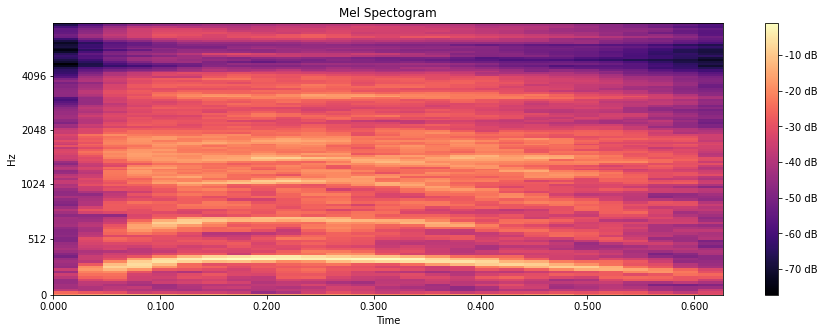

In [3]:
plot_wave_spec('/content/S01_achievement_low_02.wav','Achievement Low')

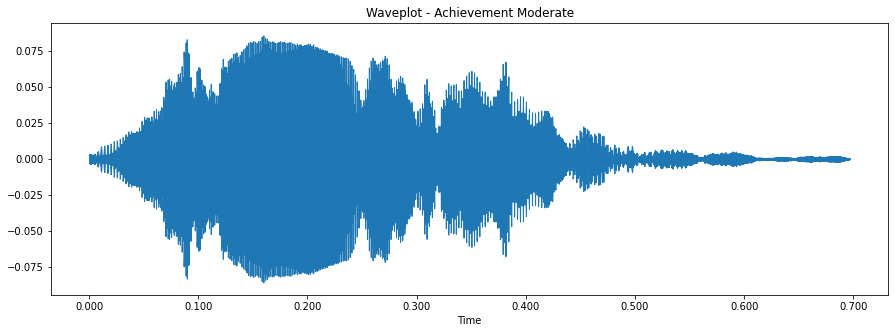

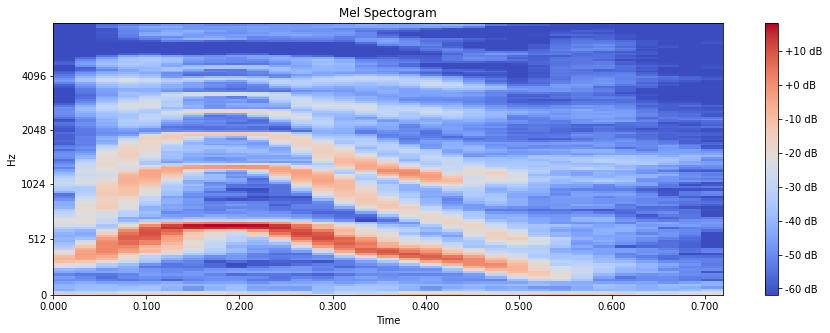

In [4]:
plot_wave_spec('/content/S02_achievement_moderate_01.wav','Achievement Moderate')

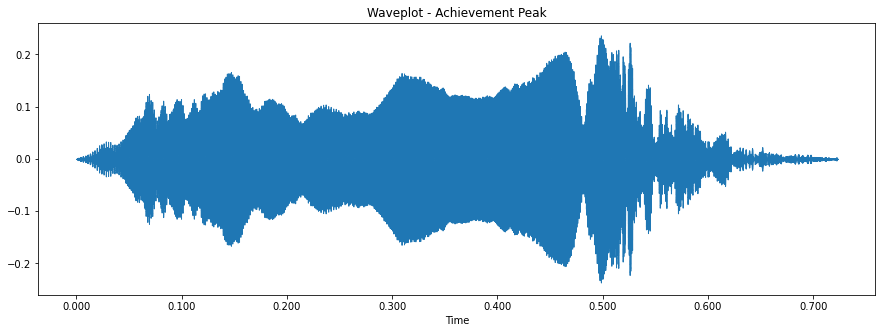

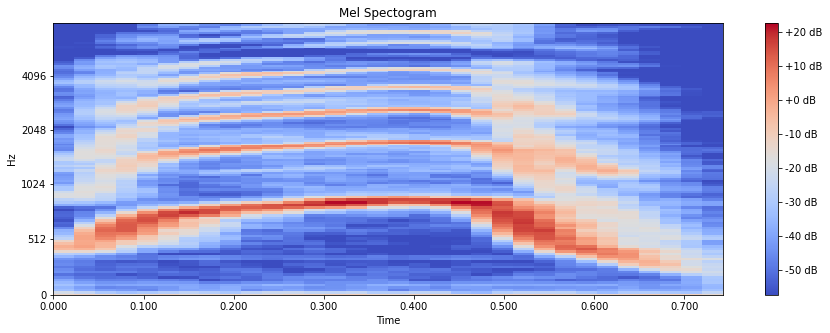

In [5]:
plot_wave_spec('/content/S02_achievement_peak_07.wav','Achievement Peak')

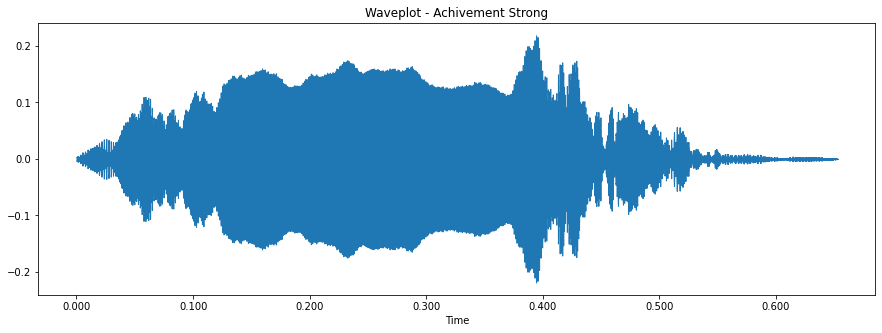

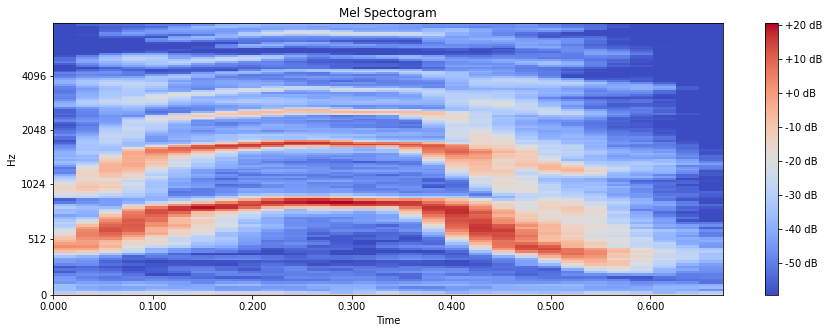

In [6]:
plot_wave_spec('/content/S02_achievement_strong_01.wav','Achivement Strong')

From the above chuck, it can be addressed that as the intensity level increases of an emotion, the loudness metric increases as well. As there's more darker red color visible in the 'Strong' intensity than the 'Low'.

Loudness / energy / PSD axis: Here it’s often possible to decide which loudness or power level correspond to the maximum and minimum color. The main use is for removing background noise from the display or to make the peaks of the harmonics brighter or more clearly defined.

## Finding the total duration of an audio on the dataset classified by the emotion 

In [7]:
def duration(audio_file):
  display(librosa.get_duration(filename=audio_file))

In [8]:
low = duration('/content/S01_achievement_low_02.wav')
moderate = duration('/content/S02_achievement_moderate_01.wav')
peak = duration('/content/S02_achievement_peak_07.wav')
strong = duration('/content/S02_achievement_strong_01.wav')

0.6215873015873016

0.6970521541950113

0.7229931972789115

0.6527437641723356

In [14]:
ager_dur = duration('/content/S01_anger_peak_011.wav')
fear_dur = duration('/content/S01_fear_peak_04.wav')
pain_dur = duration('/content/S01_pain_strong_02.wav')
surprise_dur = duration('/content/S01_surprise_peak_01.wav')

0.48360544217687074

0.627687074829932

1.7196825396825397

1.2961451247165532

From tha above chunck, we can conclude that the duration of the audio files in the dataset varies according to the emotion and the intensity of the emotion. The approximate average of the durations of the files are 6 seconds ranging from **1 < 6 seconds.**

## Compare emotion's wavelength
In this section, I will be experimenting with the wavelength parameter of the audio files. These are the most traditional way to visualize an audio data.

In [9]:
def compare_wave(emotion1, emotion2, emotion3):
  
  # plotting the waveplot
  data, sampling_rate = librosa.load(emotion1)
  plt.figure(figsize=(15, 5))
  plt.title('Waveplot - ' + 'Achievement Peak')
  wave = librosa.display.waveshow(data, sr=sampling_rate)
  plt.show()
  
  # plotting the waveplot
  data2, sampling_rate2 = librosa.load(emotion2)
  plt.figure(figsize=(15, 5))
  plt.title('Waveplot - ' + 'Fear Peak')
  wave2 = librosa.display.waveshow(data2, sr=sampling_rate2)
  plt.show()

  # plotting the waveplot
  data3, sampling_rate3 = librosa.load(emotion3)
  plt.figure(figsize=(15, 5))
  plt.title('Waveplot - ' + 'Anger Peak')
  wave3 = librosa.display.waveshow(data3, sr=sampling_rate3)
  plt.show()

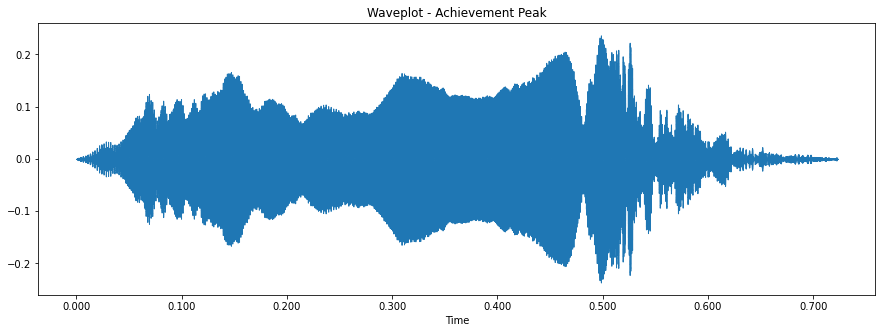

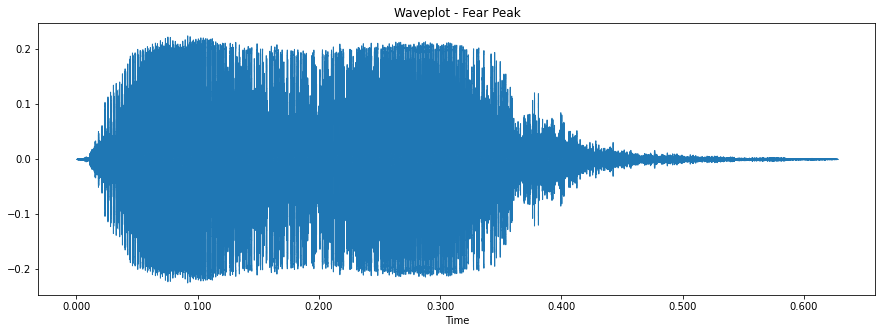

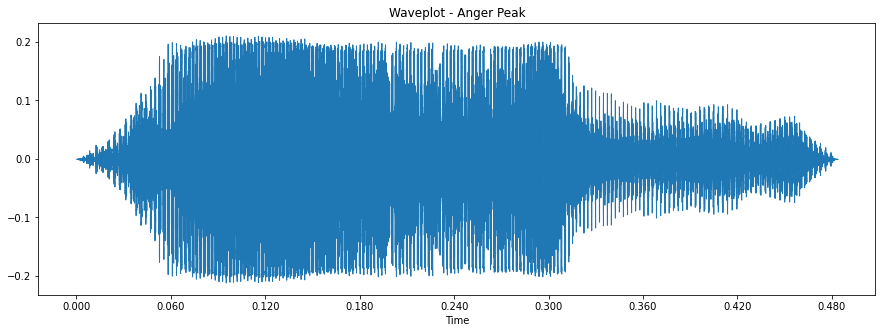

In [10]:
compare_wave(emotion1 = '/content/S02_achievement_peak_07.wav',
             emotion2 = '/content/S01_fear_peak_04.wav',
             emotion3 = '/content/S01_anger_peak_011.wav')

The above chunck illustrates the wavelength of the intensity *peak* of the three emotions; Achievement, Fear and Anger. The interesting metric that can be a result is that the plot of Anger emotion includes alot of thin lines withing the plots. This means that the emotion Anger has some echoing and more concentration on the actual pitchness of the voice. 

A bit similar affect can be seen in the emotion Fear with the thining line. But for the emotion Achievement, the wavelength has been plotted smoothly with a normal distribution of audio points throughout time.

## Total number of samples present for each emotion
In this section, I will be building a pandas dataset of the audio files which will explain about the distribution and the number of samples present for each emotion.

In [ ]:
!unzip core_set.zip

In [19]:
file_path = '/content/core_set'
emotion = []
speaker = []
level = []
file_name = []

for filename in os.listdir(file_path):
    if filename.endswith("wav"): 
      file_name.append(filename)
      for name in file_name:
        part = name.split('.')[0].split('_')
        speaker.append(part[0])
        emotion.append(part[1])
        level.append(part[2])

      
audio_df = pd.DataFrame(emotion)
audio_df = pd.concat([pd.DataFrame(speaker),audio_df,pd.DataFrame(level),pd.DataFrame(file_name)],axis=1)
audio_df.columns = ['speaker','emotion','level','file_name']
audio_df.head()

,speaker,emotion,level,file_name
0,S03,pain,strong,S03_pain_strong_082.wav
1,S03,pain,strong,S01_anger_peak_01.wav
2,S01,anger,peak,S05_pleasure_moderate_10.wav
3,S03,pain,strong,S10_surprise_moderate_02.wav
4,S01,anger,peak,S10_pleasure_peak_06.wav


In [22]:
def eda(df):
  print(f'The total number of rows present in the dataset are {df.shape[0]} and total number of columns are {df.shape[1]}')
  print(f'The total unique emotions that can be used for the project are {df.emotion.unique()}')
  print(f'The unique speakers present in the dataset are {df.speaker.unique()}')
  print(f'The different intensity level for each emotion are divided into {df.level.unique()}')


  fig = px.histogram(df, x="emotion",title = 'Distribution of Emotions')
  fig.show()

In [26]:
eda(audio_df)

 The total number of rows present in the dataset are 115440 and total number of columns are 4
The total unique emotions that can be used for the project are ['pain' 'anger' 'pleasure' 'surprise' 'fear' 'achievement']
The unique speakers present in the dataset are ['S03' 'S01' 'S05' 'S10' 'S04' 'S07' 'S08' 'S02' 'S09' 'S06']
The different intensity level for each emotion are divided into ['strong' 'peak' 'moderate' 'low']


The above bar graph illustrates the distribution of the different emotions in the dataset. From the count, the distribution is pretty balanced and there's no room for disbalance or the dataset being skewed towards one emotion.

## Fourier Transform
In this section, I'll be applying and extracting the values for plotting the Fourier Tranform. This is the plot that brings out the information about the different frequencies in the signal. As a first step, the *Short-Time Fourier Transform* is plotted as it takes into account the small windows of signals and it's helpful for the reader to capture and understand the audio in norma time duration.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning:

Casting complex values to real discards the imaginary part



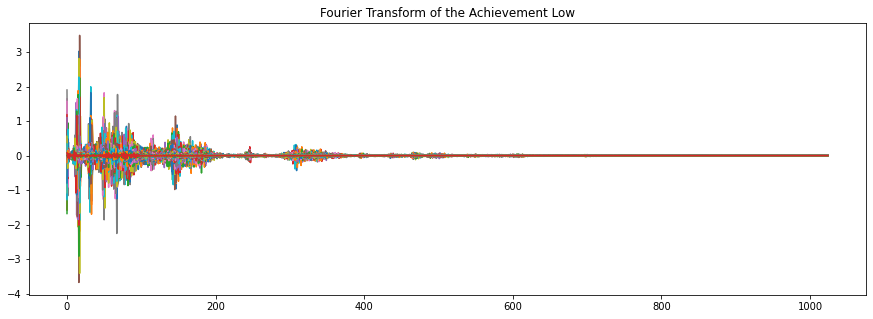

In [32]:
signal, sample_rate = librosa.load('/content/S01_achievement_low_02.wav',sr = None)
plt.figure(figsize=(15, 5))
plt.plot(librosa.stft(signal))
plt.title('Fourier Transform of the Achievement Low');

## Understanding the important features of the wavelenth/audio 

 

1.   **MFCC (Mel-Frequency Cepstral Coefficients)**: MFCC are a collection of top 10 or 20 values which single handedly represent the entire audio. These values can be used for training a classification model as well.

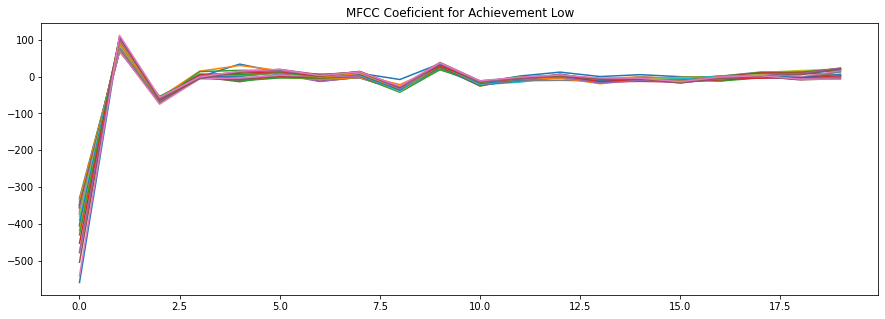

In [36]:
y, sr = librosa.load('/content/S01_achievement_low_02.wav')
plt.figure(figsize=(15, 5))
plt.plot(librosa.feature.mfcc(y=y, sr=sr))
plt.title('MFCC Coeficient for Achievement Low');

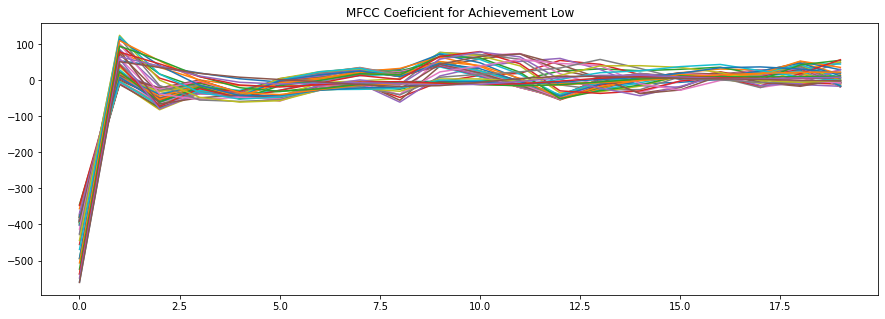

In [37]:
y, sr = librosa.load('/content/S01_surprise_peak_01.wav')
plt.figure(figsize=(15, 5))
plt.plot(librosa.feature.mfcc(y=y, sr=sr))
plt.title('MFCC Coeficient for Achievement Low');

## Conclusion
After conducting the analysis of this VIVAE dataset, the following conclusions can be formed which also act as a pointers for using the dataset for audio classification:

1.   The dataset includes five unique emotions that are equally balanced and include a fair amount of examples for each. This can be helpful for training the model.
2.   Secondly, the audio files are split into different intensity: low, moderate, strong, and peak. This can be helpful for distinguishing audio and enhancing the model's capability to pick up audio even when they are speaking lowly.


